Increase the number of matcher, fix the number of sent-to to 1

In [16]:
from util.util import load_curves, load_log

# Load Data
n = [1000]
m = [1, 2, 5, 7, 10, 15, 20]
st = [1, 1, 1, 1, 1, 1, 1]
data = {}

for _n in n:
    for _mIdx in range(len(m)):
        folder_name = f"../result/price_curve_{st[_mIdx]}_{m[_mIdx]}_{_n}_1"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{st[_mIdx]}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }
        
clob_data = {}
for _n in n:
    log = load_log(f"../clob_onchain/logs_{_n}.json")
    clob_data[f"{_n}"] = log

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


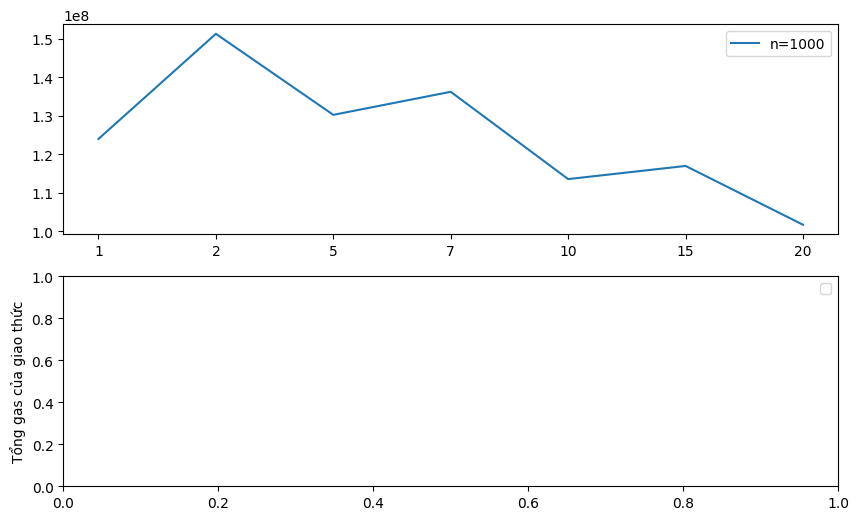

In [17]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
for i, _n in enumerate(n):
    axes[i].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["Gas"] for _m in m],
        label=f"n={_n}",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
# axes[0].set_title('Tổng gas của giao thức')
axes[1].set_ylabel('Tổng gas của giao thức')
# axes[2].set_xlabel('Số lượng Người khớp lệnh')
plt.savefig("GAS_fix_NoSendTo_increase_NoMatcher.png", bbox_inches='tight')
plt.legend()
plt.show()

TypeError: 'Axes' object is not subscriptable

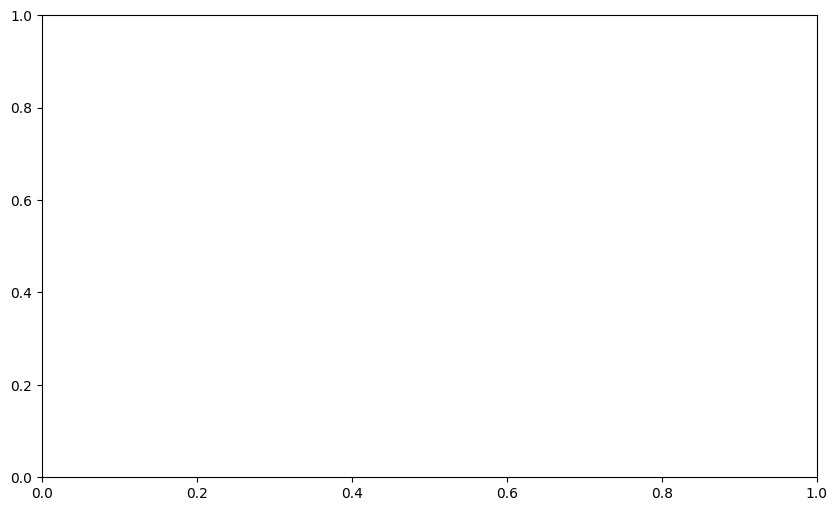

In [18]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 6))
for i, _n in enumerate(n):
    axes[i].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
            for _m in m
        ],
        label=f"n={_n}",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
# axes[0].set_title("Tổng thời gian khớp lệnh")
axes[1].set_ylabel("Tổng thời gian khớp lệnh")
axes[2].set_xlabel("Số lượng Người khớp lệnh")
plt.savefig("Time_fix_NoSendTo_increase_NoMatcher.png", bbox_inches='tight')
plt.legend()
plt.show()

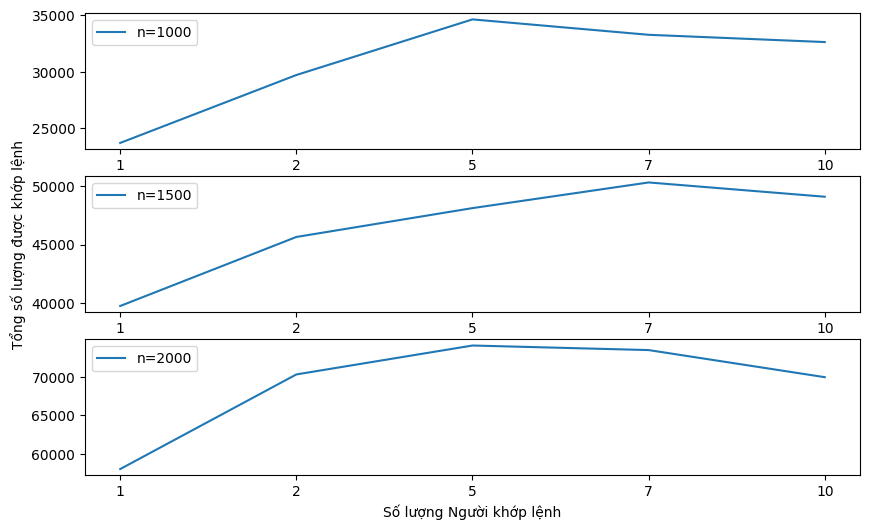

In [ ]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 6))
for i, _n in enumerate(n):
    axes[i].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchedAmount"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchedAmount"]
            for _m in m
        ],
        label=f"n={_n}",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
# axes[0].set_title("Amount")
axes[1].set_ylabel("Tổng số lượng được khớp lệnh")
axes[2].set_xlabel("Số lượng Người khớp lệnh")
plt.savefig("Amount_fix_NoSendTo_increase_NoMatcher.png", bbox_inches='tight')
plt.legend()
plt.show()